In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  ## to ignore the unnecessary warnings
pd.set_option('display.max_columns',None) ## to show each and every columns

In [2]:
## working on training data

adult_df=pd.read_csv(r'adult_data.csv',header=None,delimiter=' *, *') ##header = None as there is no header present in data
## as there is '?' in data so we have to convert it into NaN so we have to detect this special character
## for this purpose we use special delimiter " *, *"  => it removes all the leading and trailing spaces and detect "?"

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.shape

(32561, 15)

In [5]:
## associating column headers

adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### preprocessing data

In [6]:
## first we should do feature selection then handle missing values

## create a copy of a dataframe as in industry we are connected to a server
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev= adult_df_rev.drop(['fnlwgt','education'],axis=1)  ## irrelevant data fnwlgt and education is related to education num column

In [8]:
adult_df_rev.shape ## always cross check after applying any function

(32561, 13)

In [9]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
adult_df_rev.dtypes  ## here numeric value is int data type which is good ( not all var should be obj it would be problem)

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
## for a special character '?' as a missing value as it is only present in categorical variable 
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [12]:
# replacing '?' with nan values

adult_df_rev = adult_df_rev.replace(['?'],np.nan)

In [13]:
## again checking for null values

adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [14]:
adult_df_rev.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [15]:
## replacing missing values with mode values
for values in ['workclass','occupation','native_country']:
    adult_df_rev[values].fillna(adult_df_rev[values].mode()[0],inplace= True)

In [16]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
### second hand approach
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

## dummy variables using pd.get_dummies

In [18]:
adult_df_rev_new = pd.get_dummies(adult_df_rev)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
adult_df_rev_new.shape ## earlier it was 13 var now it increased to 90 var so one hot encoding is a bad idea in this situation

(32561, 90)

## label encoder

In [20]:
## we dont want to use label encoding on every var just a categorical var
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [21]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])  ## fit is responsible for training the le object and transform is used to transform on original data which it learned form training

## if we want to know what labels are associated
"""
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)
"""

"\nle_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\nprint('Feature', x)\nprint('mapping', le_name_mapping)\n"

In [22]:
adult_df_rev.head()  ## crosscheck all var got convrted into numerical data

## 0 ==> <50k
## 1 ==> >50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [23]:
adult_df_rev.dtypes  ### all var is int32

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [24]:
"""
Preprocessing of data:
1. Feature selection
2. Handling missing values [Mandatory]
3. Outlier imputation

Converting categorical values to numerical[Mandatory]
1.Manual encoding-->map()
df["Smoker"]=df["Smoker"].map({"yes":1,"no":0})

2.Create dummy variables-->pd.get_dummies()
Gender-->F,M,U
Gender_F Gender_M Gender_U
1 0 0
0 1 0
0 0 1

3.Creating levels-->LabelEncoder()
a. Identify the unique values present in the variable
b. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order
{"Private":2
"Self-emp":3
"Local-gov":1
"Fed-gov":0
}
c. Map the values into the actual variable and transform it.
2
2
0
2
1
"""

'\nPreprocessing of data:\n1. Feature selection\n2. Handling missing values [Mandatory]\n3. Outlier imputation\n\nConverting categorical values to numerical[Mandatory]\n1.Manual encoding-->map()\ndf["Smoker"]=df["Smoker"].map({"yes":1,"no":0})\n\n2.Create dummy variables-->pd.get_dummies()\nGender-->F,M,U\nGender_F Gender_M Gender_U\n1 0 0\n0 1 0\n0 0 1\n\n3.Creating levels-->LabelEncoder()\na. Identify the unique values present in the variable\nb. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order\n{"Private":2\n"Self-emp":3\n"Local-gov":1\n"Fed-gov":0\n}\nc. Map the values into the actual variable and transform it.\n2\n2\n0\n2\n1\n'

In [25]:
X=adult_df_rev.values[:,0:-1]
Y=adult_df_rev.values[:,-1]

In [26]:
X.shape

(32561, 12)

In [27]:
Y.shape

(32561,)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)
#scaler object should never be fitted on the test data.
#fit() should be implemented only on the train data and the same scaler object should be used to transform both the train as well as test data.

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [29]:
Y=Y.astype(int)  ## for safer side every value should be int and to avoid error unknown label unknown which arised due to
                  ## incompatible datatype

In [30]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=10)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
## print(list(zip(Y_test,Y_pred)))

In [32]:
## as predict func is already using this number we dont need to see this
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))  ## to convert 2d array to 1d ravel func is used from numpy
print(classifier.intercept_)
print(classifier.coef_)

[('age', 0.47914234533407735), ('workclass', -0.10451761549968867), ('education_num', 0.8631082873766729), ('marital_status', -0.3483293862127488), ('occupation', -0.016599322165623327), ('relationship', -0.18082614346947085), ('race', 0.1157226607862965), ('sex', 0.42819520292721525), ('capital_gain', 2.426869091663139), ('capital_loss', 0.28596835719523295), ('hours_per_week', 0.3795495865816532), ('native_country', 0.008818008060153945)]
[-1.50218566]
[[ 0.47914235 -0.10451762  0.86310829 -0.34832939 -0.01659932 -0.18082614
   0.11572266  0.4281952   2.42686909  0.28596836  0.37954959  0.00881801]]


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(Y_test,Y_pred))
print()
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7017  406]
 [1316 1030]]

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769


Accuracy of the model:  0.8237281195618794


### ADjusting the Threshold

In [34]:
## store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)   ## probability matrix
print(y_pred_prob)

[[0.96864499 0.03135501]
 [0.97033947 0.02966053]
 [0.23875257 0.76124743]
 ...
 [0.81409863 0.18590137]
 [0.82534471 0.17465529]
 [0.15672829 0.84327171]]


In [35]:
y_pred_class=[]
for value in y_pred_prob[:,1]:  ## if the last col is >0.4 then class is 1
    if value > 0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[6727  696]
 [1072 1274]]
Accuracy of the model:  0.8190193469137066
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7423
           1       0.65      0.54      0.59      2346

    accuracy                           0.82      9769
   macro avg       0.75      0.72      0.74      9769
weighted avg       0.81      0.82      0.81      9769



In [37]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  ## 0th row 1 col and 1th row and 0th col
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
        cfm[1,0]," , type 1 error:", cfm[0,1])
    
    
## when you are confused between multipl thresholds then we use AUC-ROC for optimum threshold

Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1747  , type 2 error : 1096  , type 1 error: 651
Errors at threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error: 616
Errors at threshold  0.44000000000000006 : 1752  , type 2 error : 1168  , type 1 error: 584
Errors at threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error: 513
Errors at threshold  0.4700000000000001 : 1718  , type 2 error : 1233  , type 1 error: 485
Errors at threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error: 459
Errors at threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error: 427
Errors at threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at

## Auc-Roc curve

In [38]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

##auc <=0.5 --> discard the model / worst model
##auc 0.5  to 0.6 --> poor
## auc 0.6-0.7 ---> bad
## auc 0.7 to 0.8--> good
## auc 0.8 to 0.9 --> vgood
## auc 0.9 to 1.0--> Excellent

# after finding overall auc
# we find individual auc whichever threshold have max auc will be considered as optimum threshold

0.8510163280208206


In [39]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

<Figure size 640x480 with 1 Axes>

In [40]:

'''AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC
'''

'AUC:\n1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.\n2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)\n3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC\n'

In [41]:
###y_pred_class is the list of predicted values on the basis of 0.46 threshold

In [42]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7246446868727519
[0.         0.09376263 1.        ]
[0.       0.543052 1.      ]


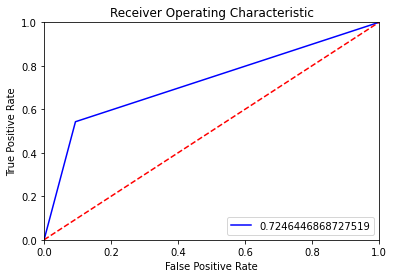

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [44]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.81842105 0.81403509 0.81790259 0.85037297 0.8293111  0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240178825739205


In [45]:
#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7016  407]
 [1315 1031]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


In [47]:
'''Recursive Feature Elimination:
1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.
2nd-(X-1) variables will be considered and the model will be rebuilt.
The process continues till the time we are left off with the given no of variables in the model.
RFE model will be ready to predict upon the testing data.'''

'Recursive Feature Elimination:\n1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.\n2nd-(X-1) variables will be considered and the model will be rebuilt.\nThe process continues till the time we are left off with the given no of variables in the model.\nRFE model will be ready to predict upon the testing data.'

In [48]:
colname=adult_df_rev.columns

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, 9)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_)  ## 1 means var retained not 1 means got eliminated

Num Features:  9
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 2 1 1 3 1 1 1 1 1 1 4]


In [50]:
Y_pred=model_rfe.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7019  404]
 [1319 1027]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8236257549390931


In [52]:
#### working on adult_test data

In [53]:
df=pd.read_csv(r'adult_test.csv',header=None,delimiter=' *, *')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [54]:
df.shape

(16281, 15)

In [55]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [56]:
df.drop(['fnlwgt','education'],axis=1,inplace=True)

In [57]:
df.shape

(16281, 13)

In [58]:
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [59]:
for i in df.columns:
    print({i:df[i].unique()})

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87], dtype=int64)}
{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)}
{'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tec

In [60]:
df=df.replace(['?'],np.nan)

In [61]:
df.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [62]:
for values in ['workclass','occupation','native_country']:
    df[values].fillna(df[values].mode()[0],inplace=True)

In [63]:
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [64]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)

In [65]:
print(colname)

['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in df.columns:
    df[x]=le.fit_transform(df[x])

In [67]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,8,3,6,4,6,3,2,1,0,0,39,37,0
1,21,3,8,2,4,0,4,1,0,0,49,37,0
2,11,1,11,2,10,0,4,1,0,0,39,37,1
3,27,3,9,2,6,0,2,1,90,0,39,37,1
4,1,3,9,4,9,3,4,0,0,0,29,37,0


In [68]:
df.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [69]:
x_test_new=df.values[:,0:-1]
y_test_new=df.values[:,-1]

In [70]:
x_test_new.shape

(16281, 12)

In [71]:
y_test_new.shape

(16281,)

In [72]:
x_test_new=scaler.transform(x_test_new)
print(x_test_new)

[[-2.24201954 -0.08529633 -1.58615841 ... -0.21665953 -0.11641921
   0.09624323]
 [-1.28895595 -0.08529633 -0.80875922 ... -0.21665953  0.69347844
   0.09624323]
 [-2.02208179 -1.89169231  0.35733957 ... -0.21665953 -0.11641921
   0.09624323]
 ...
 [-1.28895595 -0.08529633  0.74603917 ... -0.21665953  0.69347844
   0.09624323]
 [-0.84908045 -0.08529633  0.74603917 ... -0.21665953 -0.11641921
   0.09624323]
 [-1.5088937   0.81790166  0.74603917 ... -0.21665953  1.5033761
   0.09624323]]


In [73]:
Y_pred_prob=classifier.predict_proba(x_test_new)
print(Y_pred_prob)

[[0.99165692 0.00834308]
 [0.90771531 0.09228469]
 [0.85592305 0.14407695]
 ...
 [0.72665053 0.27334947]
 [0.78199766 0.21800234]
 [0.69868398 0.30131602]]


In [74]:
Y_pred_new = []
for value in Y_pred_prob[:,1]:
    if value>0.46:
        Y_pred_new.append(1)
    else:
        Y_pred_new.append(0)
print(Y_pred_new)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test_new,Y_pred_new)
print(cfm)
acc=accuracy_score(y_test_new, Y_pred_new)
print("Accuracy of the model: ",acc)
print(classification_report(y_test_new,Y_pred_new))

[[12346    89]
 [ 3529   317]]
Accuracy of the model:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     12435
           1       0.78      0.08      0.15      3846

    accuracy                           0.78     16281
   macro avg       0.78      0.54      0.51     16281
weighted avg       0.78      0.78      0.70     16281

